<a href="https://colab.research.google.com/github/mksnew111/Bike-sharing-Demand-Prediction/blob/main/Regression_Project_Sample_ML_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Bike sharing Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

A bike rental or bike hire business offers bicycles for short durations, typically a few hours, catering primarily to individuals without personal vehicle access, notably travelers and tourists, akin to car rental services. These rental shops provide bikes for daily, weekly, and hourly periods. Presently, rental bikes are being introduced in numerous urban areas to improve mobility convenience. Ensuring timely availability and accessibility of rental bikes is crucial to minimize wait times.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**





Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [108]:
# Import Libraries
import pandas as pd        # pandas provides wide variety of tool for data analysis.
import numpy as np         # numpy provides basic math operation and working with array.

import matplotlib.pyplot as plt   # comprehensive library for interactive visualizations.
import seaborn as sns             # High level interface for drawing a informative staticals graph.
%matplotlib inline

import missingno as msno    # missingno library for visualizing the missing data in datasets.

from statsmodels.stats.outliers_influence import variance_inflation_factor   #  for calculate the variance inflation factor for each independent variable.

import scipy.stats as stats     # For drawing QQ plot

from sklearn.preprocessing import StandardScaler   #  Standardize features in dataset.
from sklearn.model_selection import train_test_split  # splitting datasets into two subsets: one for training and the other for testing.

from sklearn.linear_model import LinearRegression     # Importing Linearregression ML model.
from sklearn.linear_model import Ridge                # Importing Ridge ML model.
from sklearn.linear_model import Lasso                # Importing Lasso ML model.
from sklearn.ensemble import RandomForestRegressor    # Importing Randomfrorestregressor ML model.

from sklearn.model_selection import cross_val_score   # Importing  for cross validation
from sklearn.model_selection import GridSearchCV      # Importing for Hyperparameter tunning.

# Importing essential library to checking accuracy
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



### Dataset Loading

In [109]:
# Load Dataset
from google.colab import drive
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [110]:
file_path = '/content/drive/MyDrive/Dataset/SeoulBikeData.csv'

### Dataset First View

In [111]:
# Dataset First Look
df = pd.read_csv(file_path,encoding= 'unicode_escape')
df.head()   # First five rows

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [112]:
# Last five rows
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


### Dataset Rows & Columns count

In [113]:
# Dataset Rows & Columns count
print(f"Number of Observation: {df.shape[0]}")
print(f"Number of Features: {df.shape[1]}")

Number of Observation: 8760
Number of Features: 14


### Dataset Information

In [114]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [115]:
# Dataset Duplicate Value Count
df[df.duplicated()].count()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

#### Missing Values/Null Values

In [116]:
# Missing Values/Null Values Count
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

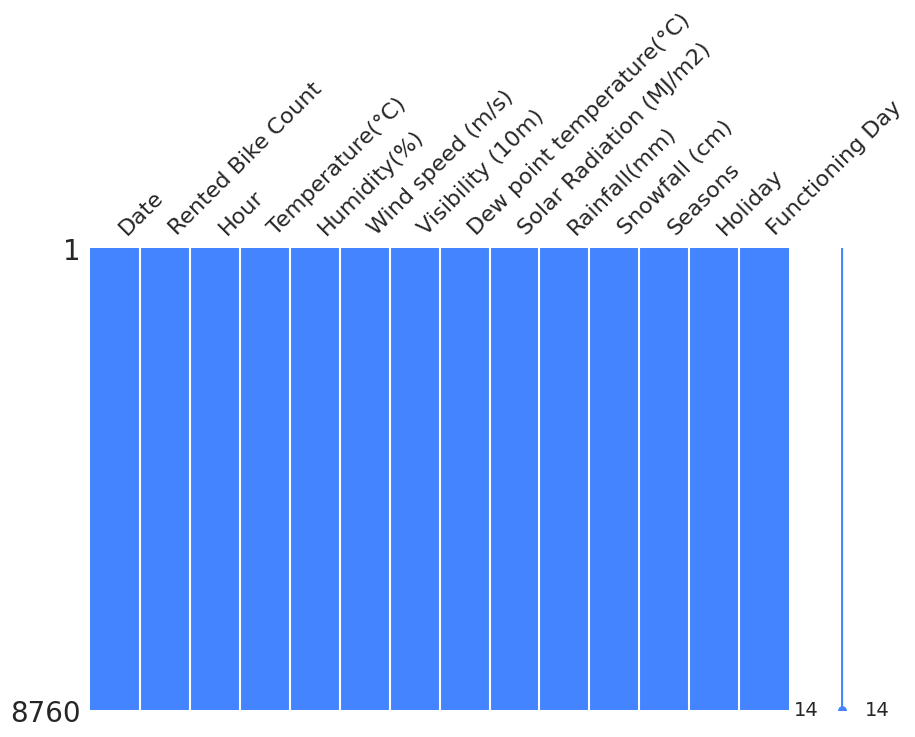

In [117]:
# Visualizing the missing values
msno.matrix(df, figsize=(10,6),color=(0.27, 0.52, 1.0))
plt.show()

### What did you know about your dataset?



1. In this dataset, we have 14 features and 8760 observations.
2. There are 10 Numeric features and 4 categorical features.
3. Columns: Rented Bike Count, Hour, Humidity and visibility are of int64 numeric data types.
4. columns: Temperature, Wind speed, Dew point temperature, Solar Radiation,
Rainfall, Snowfall are of float64 numeric data types.
5. Columns: Date, Seasons, Holiday and Functioning Day are object data types.
6. No Duplicate rows are present in the dataset.
7. Not any Null values present in any Columns.



## ***2. Understanding Your Variables***

In [118]:
# Dataset Columns
list(df.columns)

['Date',
 'Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Functioning Day']

In [119]:
# Dataset Describe
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### Variables Description


#### Date:  Date of Rented Bike

#### Rented Bike count:  Number of total rentals

#### Hour: Hours of the day

#### Temperature(°C): Weather Temperature in °C

#### Humidity(%): Humidity of the day in %

#### Wind speed (m/s): Wind speed in m/s

#### Visibility (10m): Atmospherical Visibility within 10 𝑚 range

#### Dew point temperature(°C): Dew Point Temperature - T in °C

#### Solar Radiation (MJ/m2): Indicate light and energy that comes from the sun in MJ/m2

#### Rainfall(mm): Rain fall in mm

#### Snowfall (cm): Snow fall in cm

#### Seasons: Autumn, Spring, Summer, Winter

#### Holiday: Whether the day is considered a holiday

####  Day: Whether the day is neither a weekend nor holiday

### Check Unique Values for each variable.

In [120]:
# Check Unique Values for each variable.
def nunique_count(df:pd.DataFrame):
  ''' This function calculate the number of unique count of each variable. '''
  dict1 = {}
  for i in df.columns:
    dict1[i] = df[i].nunique()
  return pd.DataFrame(list(dict1.items()), columns=['variable_name','unique_count'])


In [121]:
nunique_count(df)

,variable_name,unique_count
0,Date,365
1,Rented Bike Count,2166
2,Hour,24
3,Temperature(°C),546
4,Humidity(%),90
5,Wind speed (m/s),65
6,Visibility (10m),1789
7,Dew point temperature(°C),556
8,Solar Radiation (MJ/m2),345
9,Rainfall(mm),61


In [122]:
# unique count of categorical variable
def cat_unique_count(column_name,df):

  """ This function takes list of column name and retrun unique value of columns. """

  unique_value = {}
  for i in column_name:
    unique_value[i] = df[i].unique()
  return pd.DataFrame(list(unique_value.items()),columns=['categorical_variable','unique_name'])


In [123]:
column_name = ['Seasons','Holiday','Functioning Day']
cat_unique_count(column_name, df)

,categorical_variable,unique_name
0,Seasons,"[Winter, Spring, Summer, Autumn]"
1,Holiday,"[No Holiday, Holiday]"
2,Functioning Day,"[Yes, No]"


## 3. ***Data Wrangling***

### Data Wrangling Code

In [124]:
# Write your code to make your dataset analysis ready.
df.Date.dtype     # Date column is object type

dtype('O')

In [125]:
# convert the Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

<ipython-input-125-79a675d70d84>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


0      2017-01-12
1      2017-01-12
2      2017-01-12
3      2017-01-12
4      2017-01-12
          ...    
8755   2018-11-30
8756   2018-11-30
8757   2018-11-30
8758   2018-11-30
8759   2018-11-30
Name: Date, Length: 8760, dtype: datetime64[ns]

### What all manipulations have you done and insights you found?


### Because our date column is of object type, I have converted it into a datetime column.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***


## Chart-1
##The total number of bikes required is  based on the function of the day.

  Functioning Day  Rented Bike Count
0              No                  0
1             Yes            6172314




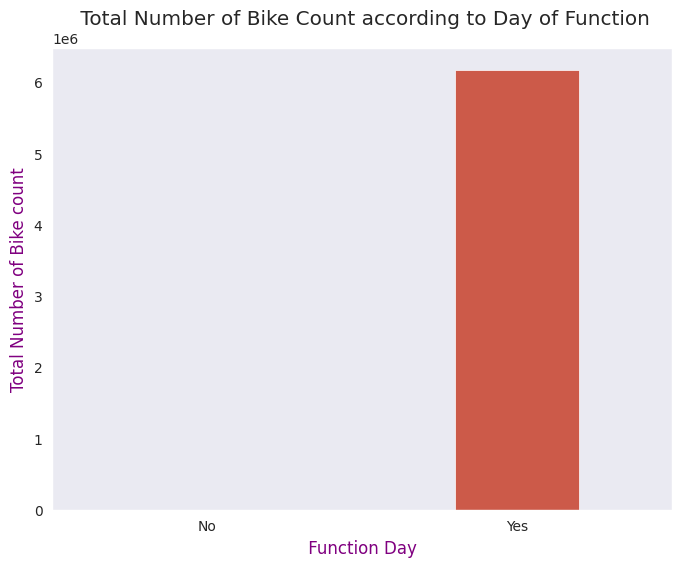

In [126]:
# Chart - 1 visualization code
function_day_bikecount = df.groupby(['Functioning Day'])['Rented Bike Count'].sum().reset_index()
print(function_day_bikecount)
print('\n')
plt.figure(figsize=(8,6)) # chart size
sns.set_style('dark')   # set style of graph
sns.barplot(data=function_day_bikecount, x='Functioning Day',y='Rented Bike Count',width = 0.40)
# Title of graph
plt.title(" Total Number of Bike Count according to Day of Function")
# Label of graph
plt.xlabel(" Function Day ",color = 'purple')
plt.ylabel("Total Number of Bike count",color='purple')
# showing the graph
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are great for comparing different categories. Here, I have to count the number of bikes required in two categories, yes or no.

##### 2. What is/are the insight(s) found from the chart?



*   
Bikes are only required on days with "yes" in the function "day.




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above graph, it's evident that no bikes are required on "NO" function days. Hence, it's crucial to ensure an adequate supply of bikes specifically for "YES" function days.

###Chart - 2

###The total number of bike counts is calculated based on the days marked as holidays







      Holiday  Rented Bike Count
0     Holiday             215895
1  No Holiday            5956419


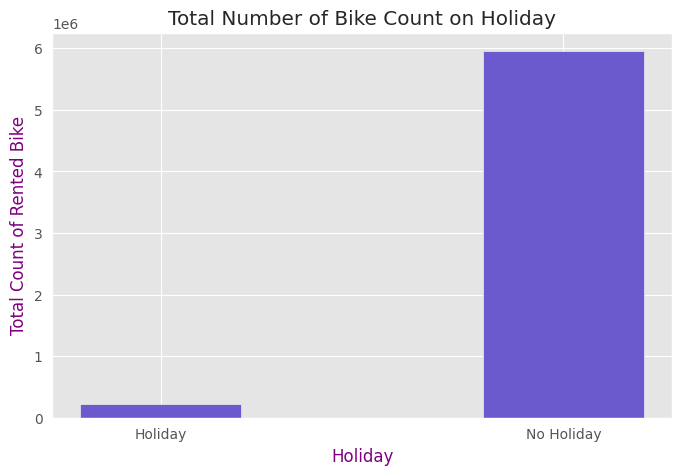

In [127]:
# Chart - 2 visualization code
bikecount_on_holiday = df.groupby(['Holiday'])['Rented Bike Count'].sum().reset_index()
print(bikecount_on_holiday)
# Chart size
plt.figure(figsize=(8,5))
# Chart style
plt.style.use('ggplot')

plt.bar(x=bikecount_on_holiday['Holiday'], height = bikecount_on_holiday['Rented Bike Count'],
        width = 0.40,
        color='slateblue')
# Chart title
plt.title("Total Number of Bike Count on Holiday")
# Chart labels
plt.xlabel("Holiday",color='purple')
plt.ylabel("Total Count of Rented Bike",color='purple')
# showing the chart
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are great for comparing different categories. here, i have to count the number of bike required in two category Holiday  yes or no.

##### 2. What is/are the insight(s) found from the chart?



*   On No holiday, i.e., working days, a higher number of bikes are needed.
*  On holidays, the demand for bikes is significantly lower compared to no-holidays.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained can lead to a positive business impact by highlighting the necessity of ensuring an adequate supply of bikes on non-holidays compared to holidays.






#### Chart - 3



### Count of bike rentals based on seasons.

  Seasons  Rented Bike Count
0  Autumn            1790002
1  Spring            1611909
2  Summer            2283234
3  Winter             487169


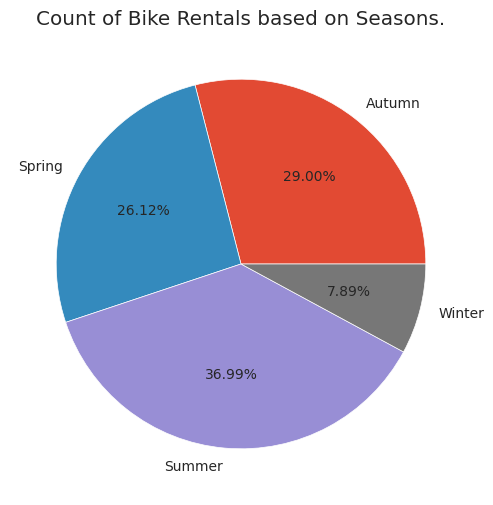

In [128]:
# Chart - 3 visualization code
seasons_df = df.groupby(['Seasons'])['Rented Bike Count'].sum().reset_index()
print(seasons_df)

plt.figure(figsize=(8,6))  # Graph size
sns.set_style("dark")
plt.pie(seasons_df['Rented Bike Count'], labels=seasons_df['Seasons'],autopct='%.2f%%')
plt.title("Count of Bike Rentals based on Seasons.")
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart is a graphical representation technique that displays data in a circular-shaped graph. It is a composite static chart that works best with few variables. Pie charts are often used to represent data points belonging to a combination of different categories. Each of these categories is represented as a “slice of the pie.” The size of each slice is directly proportional to the number of data points that belong to a particular category.

##### 2. What is/are the insight(s) found from the chart?



*  The peak season for bike rentals was during summer, with the maximum number of bikes rented.
*   The winter season saw the minimum number of bike rentals.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

### The count of rented bikes is influenced by temperature and humidity levels.


In [129]:
# creating function
def create_groupby_df(feature_name):
  """ This function accepts a column name as input and performs a groupby operation,
   summing the Rented Bike Count. """

  result = df.groupby([feature_name])['Rented Bike Count'].sum().reset_index()
  return result

In [130]:
# Using function, groupby Temperature column to count rented bike.
temp_df = create_groupby_df('Temperature(°C)')
temp_df

,Temperature(°C),Rented Bike Count
0,-17.8,322
1,-17.5,291
2,-17.4,64
3,-16.9,36
4,-16.5,96
...,...,...
541,38.0,1184
542,38.7,475
543,39.0,1033
544,39.3,531


In [131]:
# Using function, groupby Humidity column to count rented bike.
humid_df = create_groupby_df('Humidity(%)')
humid_df

,Humidity(%),Rented Bike Count
0,0,6930
1,10,1315
2,11,1986
3,12,2032
4,13,4353
...,...,...
85,94,13669
86,95,12146
87,96,18962
88,97,28730


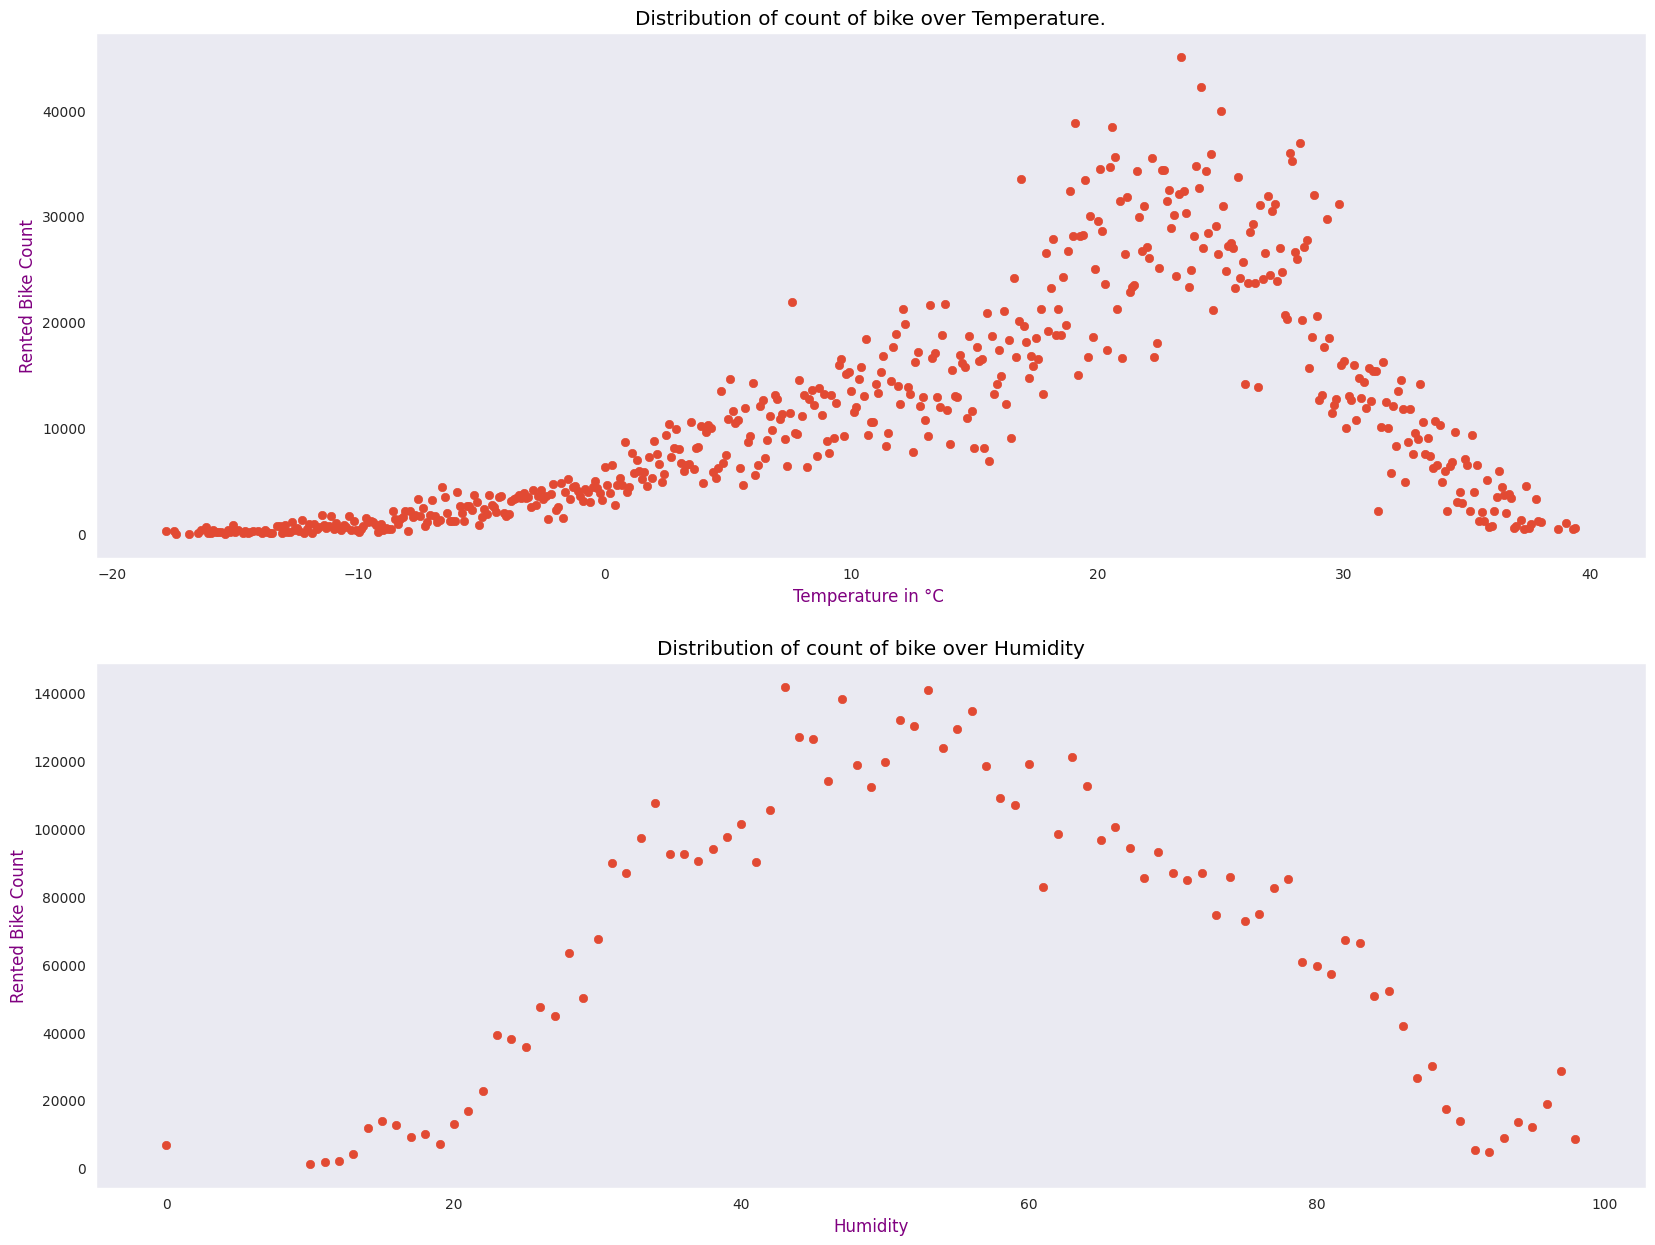

In [132]:
# Chart - 4 visualization code

fig, ax = plt.subplots(2, figsize=(20,15))
# Scatter plot of Rented Bike count vs Temperature
ax[0].scatter(x=temp_df['Temperature(°C)'], y =temp_df['Rented Bike Count'])
ax[0].set_title("Distribution of count of bike over Temperature.",color = 'black')
ax[0].set_xlabel("Temperature in °C ",color = 'purple')
ax[0].set_ylabel("Rented Bike Count",color = 'purple')

# Scatter plot of Rented Bike Count vs Humidity
ax[1].scatter(x=humid_df['Humidity(%)'],y=humid_df['Rented Bike Count'])
ax[1].set_title("Distribution of count of bike over Humidity",color='black')
ax[1].set_xlabel("Humidity",color = 'purple')
ax[1].set_ylabel("Rented Bike Count",color = 'purple')

plt.show()

##### 1. Why did you pick the specific chart?

Scatter plots provide insight into the strength and direction of the correlation between two variables. A tight cluster of points indicates a strong correlation, while a more scattered distribution suggests a weaker correlation. Scatter plots also provide information about the distribution of data points.


##### 2. What is/are the insight(s) found from the chart?

Following information get from this graph: -


1.   The peak demand for bikes occurs within the temperature range of 20 to 30 degrees Celsius.

2.   Bike usage decreases notably for temperatures below 10 degrees and above 30 degrees Celsius.

3.   Optimal bike demand aligns with humidity levels between 40 to 60, which coincides with a comfortable range of humidity.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5


###The quantity of bikes rented at various times throughout different days.



    Hour  Rented Bike Count
22    22             336821
10    10             192655
13    13             267635
16    16             339677
9      9             235784
23    23             244961
21    21             376479
18    18             548568
19    19             436229
14    14             276971


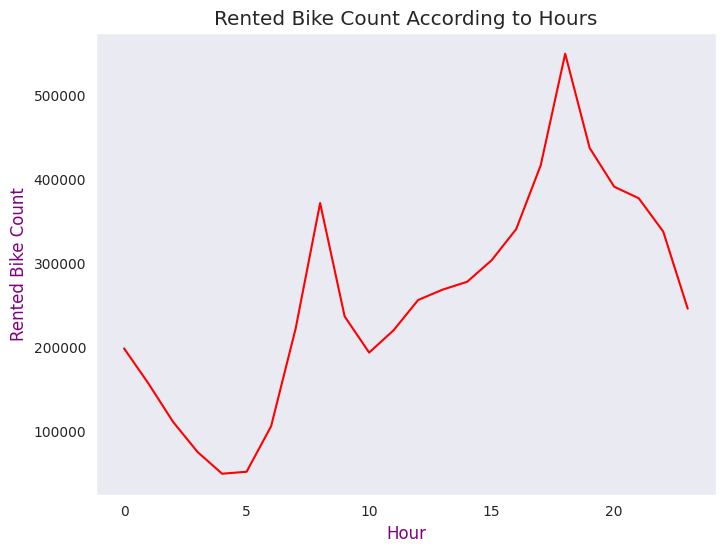

In [133]:
# Chart - 5 visualization code
hour_df = create_groupby_df('Hour')
print(hour_df.sample(10))
# Graph size
plt.figure(figsize=(8,6))
sns.lineplot(x='Hour',y='Rented Bike Count',data=hour_df, color = 'red')
plt.xlabel("Hour",color = 'purple')
plt.ylabel("Rented Bike Count",color = 'purple')
plt.title("Rented Bike Count According to Hours")
plt.show()

##### 1. Why did you pick the specific chart?

 Line plots connect data points in a continuous line, emphasizing the sequential nature of the data. This helps in understanding the progression or evolution of a variable over time or another continuous dimension.

##### 2. What is/are the insight(s) found from the chart?

The highest demand for bikes occurs during the evening hours between 4pm to 8pm.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6
###The number of Rented Bikes is influenced by rainfall.

   Rainfall(mm)  Rented Bike Count
0           0.0            6086009
1           0.1              15179
2           0.2               3706
3           0.3               1401
4           0.4               2147
5           0.5              28604
6           0.7                165
7           0.8                288
8           0.9               1468
9           1.0               8419


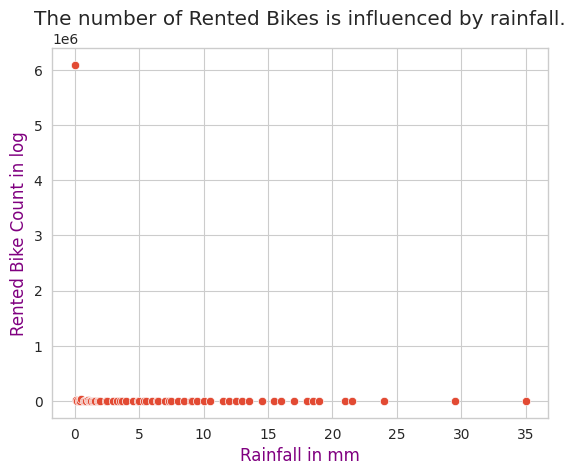

In [134]:
# Chart - 6 visualization code
rainfall_df = create_groupby_df('Rainfall(mm)').sort_values(by='Rainfall(mm)',ascending=True)
print(rainfall_df.head(10))

sns.set_style("whitegrid")
sns.scatterplot(x='Rainfall(mm)',y='Rented Bike Count',data = rainfall_df)
plt.title("The number of Rented Bikes is influenced by rainfall.")
plt.xlabel("Rainfall in mm",color='purple')
plt.ylabel("Rented Bike Count in log",color='purple')
plt.show()

##### 1. Why did you pick the specific chart?

Scatter plots provide information about the distribution of data points across the range of each variable, which can aid in understanding the spread of the data.

##### 2. What is/are the insight(s) found from the chart?


The graph reveals that there is a high demand for rented bikes when rainfall is less than 5mm.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight indicates a negative trend for the business, as the rental bike count decreases with increasing rainfall.

#### Chart - 7
###The number of Rented Bikes is influenced by Snowfall.

   Snowfall (cm)  Rented Bike Count
0            0.0            6090314
1            0.1                205
2            0.2               3643
3            0.3               8304
4            0.4               5981
5            0.5               4716
6            0.6               2775
7            0.7               5108
8            0.8               5632
9            0.9               4854


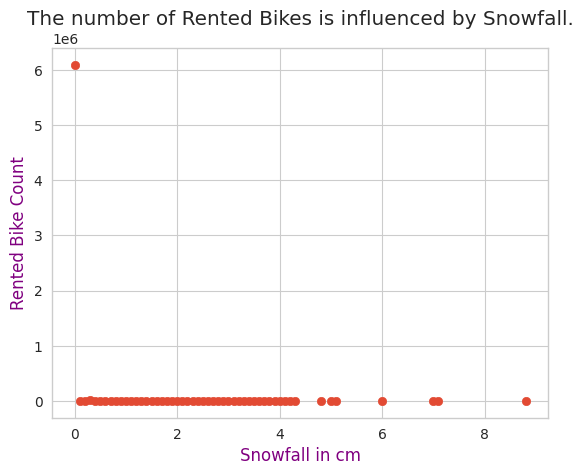

In [135]:
# Chart - 7 visualization code
snowfall_df = create_groupby_df('Snowfall (cm)')
print(snowfall_df.head(10))

plt.scatter(x = snowfall_df['Snowfall (cm)'], y = snowfall_df['Rented Bike Count'])
plt.title("The number of Rented Bikes is influenced by Snowfall.")
plt.xlabel("Snowfall in cm",color='purple')
plt.ylabel("Rented Bike Count",color='purple')
plt.show()

##### 1. Why did you pick the specific chart?

Scatter plots provide information about the distribution of data points across the range of each variable, which can aid in understanding the spread of the data.

##### 2. What is/are the insight(s) found from the chart?

The graph reveals that there is a high demand for rented bikes when snowfall is less than 4cm.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight indicates a negative trend for the business, as the rental bike count decreases with increasing snowfall.

#### Chart - 8

###Rented bike count on different visibility

   Visibility (10m)  Rented Bike Count
0                27                 83
1                33                 33
2                34                 24
3                38                 98
4                53                 65
5                54                 42
6                59                 52
7                63                 43
8                66                855
9                70                 19


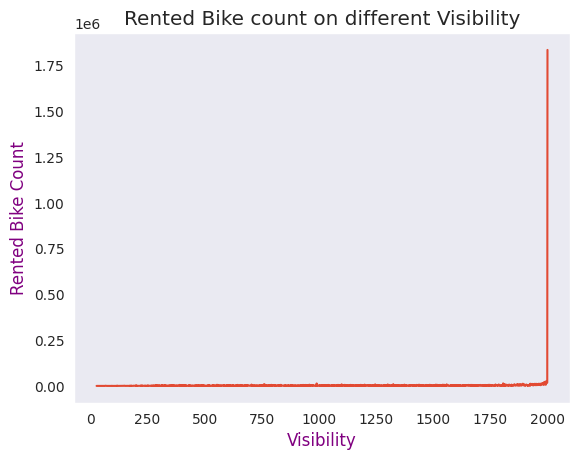

In [136]:
# Chart - 8 visualization code
visibility_df = create_groupby_df('Visibility (10m)')
print(visibility_df.head(10))

sns.set_style("dark")
sns.lineplot(x='Visibility (10m)',y='Rented Bike Count',data = visibility_df)
plt.title("Rented Bike count on different Visibility")
plt.xlabel("Visibility", color='purple')
plt.ylabel("Rented Bike Count",color='purple')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Customers prefer higher visibility, as evidenced by the analysis of the visibility_bike dataframe, which shows that increasing visibility corresponds to an increase in rented bikes.






##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [137]:
# Chart - 10 visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11
###Analyze the count of rented bikes across different seasons and hours

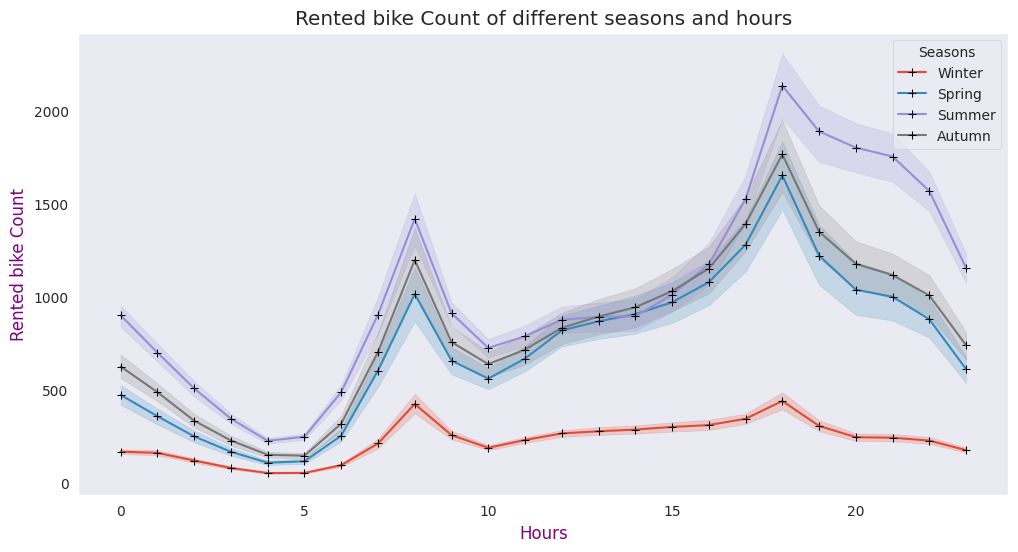

In [138]:
# Chart - 11 visualization code
plt.figure(figsize=(12,6))
#palette = sns.color_palette("tab10", 4)
sns.lineplot(data=df, x="Hour", y="Rented Bike Count",
             hue="Seasons",
             marker="+",
             markeredgecolor='black'
             )
plt.title("Rented bike Count of different seasons and hours")
plt.xlabel("Hours",color='purple')
plt.ylabel("Rented bike Count",color='purple')
plt.show()


##### 1. Why did you pick the specific chart?

 Line charts can display multiple data series on the same plot, making it easy to compare between different categories or variables. This comparative aspect is useful for analyzing relationships or differences in data.

##### 2. What is/are the insight(s) found from the chart?


The graph provides the following insights:

* The maximum count of rented bikes occurs during the summer season, followed by autumn, spring, and winter.

* The most preferred time for renting bikes is in the evening, specifically between 4pm and 8pm.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

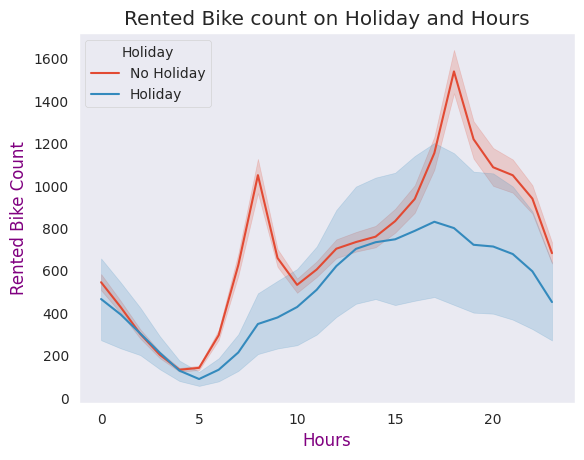

In [139]:
# Chart - 12 visualization code

sns.lineplot(data=df, x="Hour", y="Rented Bike Count",
              hue="Holiday",
             markers = True
             )
plt.title("Rented Bike count on Holiday and Hours")
plt.xlabel("Hours",color='purple')
plt.ylabel("Rented Bike Count",color='purple')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [140]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

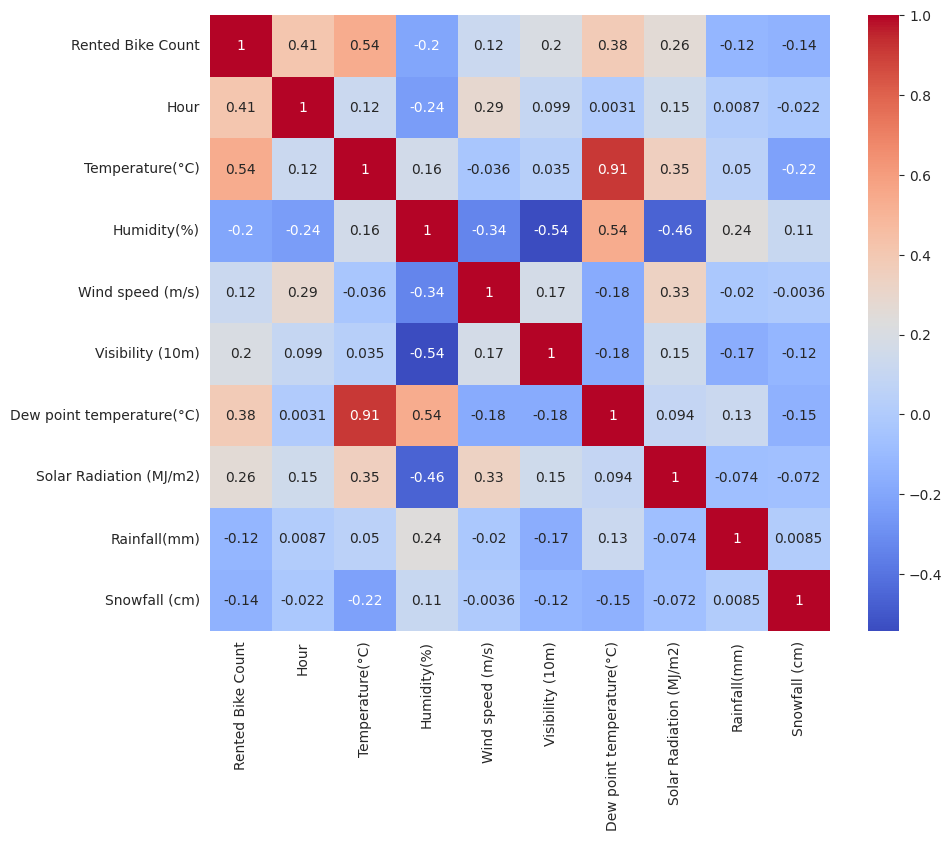

In [141]:
# Correlation Heatmap visualization code
numeric_df = df[df.describe().columns]
data_corr = numeric_df.corr()
plt.figure(figsize = (10,8))

sns.heatmap(data_corr,annot = True, cmap = 'coolwarm')
plt.show()

##### 1. Why did you pick the specific chart?

Correlation coefficients quantify the strength and direction of the linear relationship between two variables. By incorporating correlation values into a heatmap, you can quickly see which variables are positively correlated, negatively correlated or not correlated at all.

Heatmaps visually represent data using color gradients, making it easier to spot patterns and trends.

##### 2. What is/are the insight(s) found from the chart?



1.   The target column, Rented bike count, exhibits the strongest correlations with Hour, temperature, and dew point temperature.

2. Rented bike count shows negative correlations with Humidity, Rainfall, and Snowfall.

3. Hour demonstrates negative correlations with Humidity and snowfall.

4. Temperature displays a high positive correlation with dew point temperature and negative correlations with snowfall and wind speed.

5. Humidity demonstrates significant correlations with Dew point temperature and negative correlations with solar radiation, visibility, and wind speed.




#### Chart - 15 - Pair Plot

In [142]:
# Pair Plot visualization code
#sns.pairplot(df,hue='Seasons',kind='scatter',diag_kind='kde',corner='True')
#plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [143]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [144]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [145]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [146]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

## Not any null value present in our dataset.

### 2. Handling Outliers

In [147]:
# Handling Outliers & Outlier treatments
numeric_df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


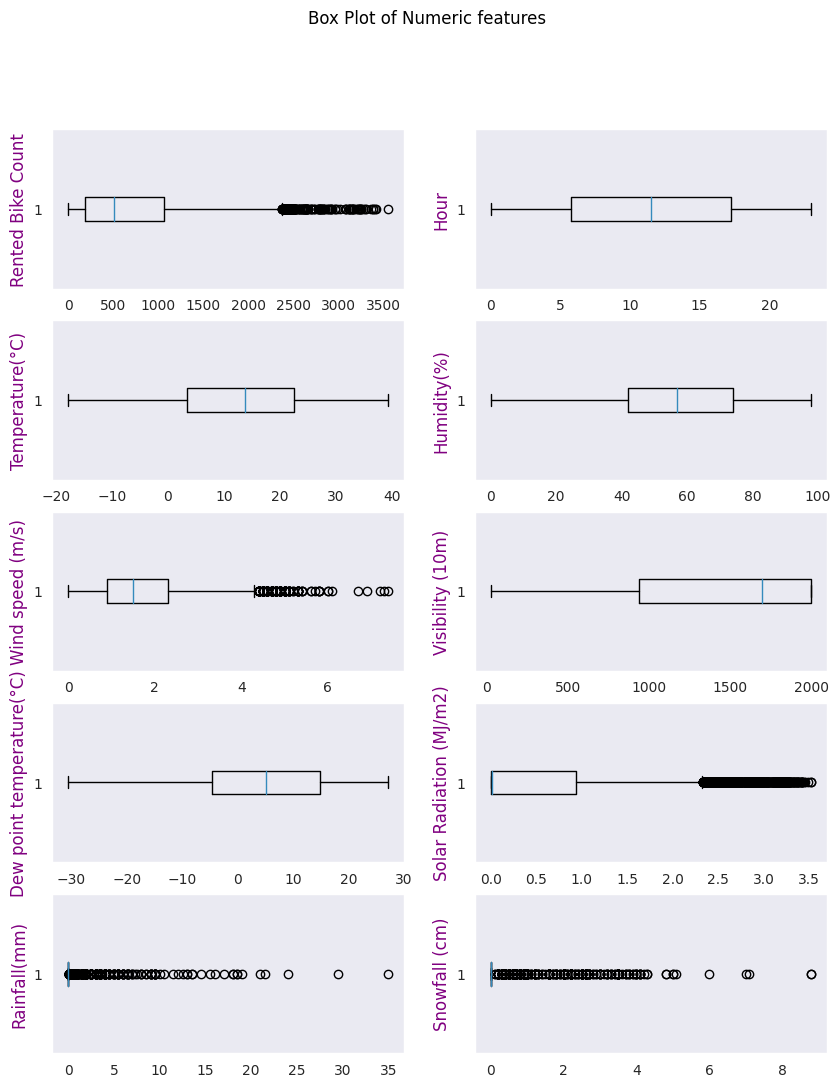

In [148]:
# Box plot for numeric features
plt.figure(figsize=(10,12))
for index, column in enumerate(numeric_df.columns):
  plt.subplot(5,2,index+1)
  plt.boxplot(df[column],vert = False)
  plt.ylabel(column,color='purple')
# Title of Graph
plt.suptitle("Box Plot of Numeric features",color='black')
plt.show()

In [149]:
# Examining the extent of outlier behavior within the target column (Rented Bike Count).
# q1=df['Rented Bike Count'].quantile(0.25)
# q3 = df['Rented Bike Count'].quantile(0.75)
# iqr = q3-q1
# df[df['Rented Bike Count']> (q3+1.5*iqr)]['Rented Bike Count'].shape

** Approximately 33% of the data (2878 rows out of 8760 rows) in the target feature were identified as outliers. Given the significant proportion, these outlier rows were not treated and were left unchanged.**

In [150]:
# creating a feature name list which contain outliers.
outlier_cols = ['Rainfall(mm)','Wind speed (m/s)','Snowfall (cm)','Solar Radiation (MJ/m2)']
outlier_cols

['Rainfall(mm)',
 'Wind speed (m/s)',
 'Snowfall (cm)',
 'Solar Radiation (MJ/m2)']

In [151]:
# Calculating IQR of outlier columns
Q1 = df[outlier_cols].quantile(0.25)
Q3 = df[outlier_cols].quantile(0.75)
IQR = Q3-Q1
IQR

Rainfall(mm)               0.00
Wind speed (m/s)           1.40
Snowfall (cm)              0.00
Solar Radiation (MJ/m2)    0.93
dtype: float64

In [152]:
# calculating upper fence and lower fence
upper_fence = Q3 + (1.5*IQR)
lower_fence = Q1 - (1.5*IQR)

In [153]:
# Removing the outliers
df[outlier_cols] = df[outlier_cols][~((df[outlier_cols] < lower_fence) | (df[outlier_cols] > upper_fence))]

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8599 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8119 non-null   float64       
 9   Rainfall(mm)               8232 non-null   float64       
 10  Snowfall (cm)              8317 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida


 After removing outliers from these four columns, some null values might have been introduced. Now, we have the option to either delete the observations with null values or impute them with meaningful values. In this case, I will choose to impute them with the mean value of each column.

In [155]:
# creating function to impute the null value with mean value.
def fill_null_value(outlier_cols):
  """ This function fill the null value with mean of the columns """
  for col in outlier_cols:
     df[col].fillna(df[col].mean(), inplace=True)

# calling the function
fill_null_value(outlier_cols)

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

##### What all outlier treatment techniques have you used and why did you use those techniques?


After assessing outliers in our dataset using the Interquartile Range (IQR) method, I visualized the data through box plot graphs. Upon analysis, it became evident that the target feature, 'Rented Bike Count', as well as features such as Rainfall, Wind speed, Snowfal, and Solar Radiation contain outliers.

Approximately 33% of the data (2878 rows out of 8760 rows) in the target feature were identified as outliers. Given the significant proportion, these outlier rows were not treated and were left unchanged.

For the remaining features, outliers were removed, resulting in the creation of some null values in the dataset. To handle these null values, I opted to replace them with the mean values of their respective features.

### 3. Categorical Encoding

There are three categorical columns:
1. Seasons
2. Holiday
3. Functioning Day

In [157]:
# Encode your categorical columns
# Encoding Seasons column
df['Winter'] = np.where(df['Seasons']=='Winter',1,0)
df['Spring'] = np.where(df['Seasons']=='Spring',1,0)
df['Summer'] = np.where(df['Seasons']=='Summer',1,0)
df['Autumn'] = np.where(df['Seasons']=='Autumn',1,0)

# droping the seasons column from the dataframe
df.drop(columns=['Seasons'],axis=1, inplace=True)

In [158]:
# Encoding Holiday column:- Holiday= 1, No Holiday = 0
df['Holiday'] = np.where(df['Holiday'] == 'Holiday',1,0)

In [159]:
# Encoding Function day:- Yes = 1, No = 0
df['Functioning Day'] = np.where(df['Functioning Day'] == 'Yes',1,0)


#### What all categorical encoding techniques have you used & why did you use those techniques?



1.   In the 'Seasons' column, which contains four distinct categories, I created four separate columns to represent each category and encoded them accordingly.

2. For the 'Holiday' column, which comprises two categories ('Holiday' and 'No Holiday'), I encoded 'Holiday' as 1 and 'No Holiday' as 0.

3. Similarly, in the 'Function Day' column, which also contains two categories ('Yes' and 'No'), I encoded 'Yes' as 1 and 'No' as 0.



### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [160]:
# Expand Contraction

#### 2. Lower Casing

In [161]:
# Lower Casing

#### 3. Removing Punctuations

In [162]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [163]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [164]:
# Remove Stopwords

In [165]:
# Remove White spaces

#### 6. Rephrase Text

In [166]:
# Rephrase Text

#### 7. Tokenization

In [167]:
# Tokenization

#### 8. Text Normalization

In [168]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [169]:
# POS Taging

#### 10. Text Vectorization

In [170]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [171]:
# Manipulate Features to minimize feature correlation and create new features
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

df.drop(columns=['Date'],axis=1, inplace=True)

# I extracted the day, month, and year from the datetime and created three new columns.


#### 2. Feature Selection

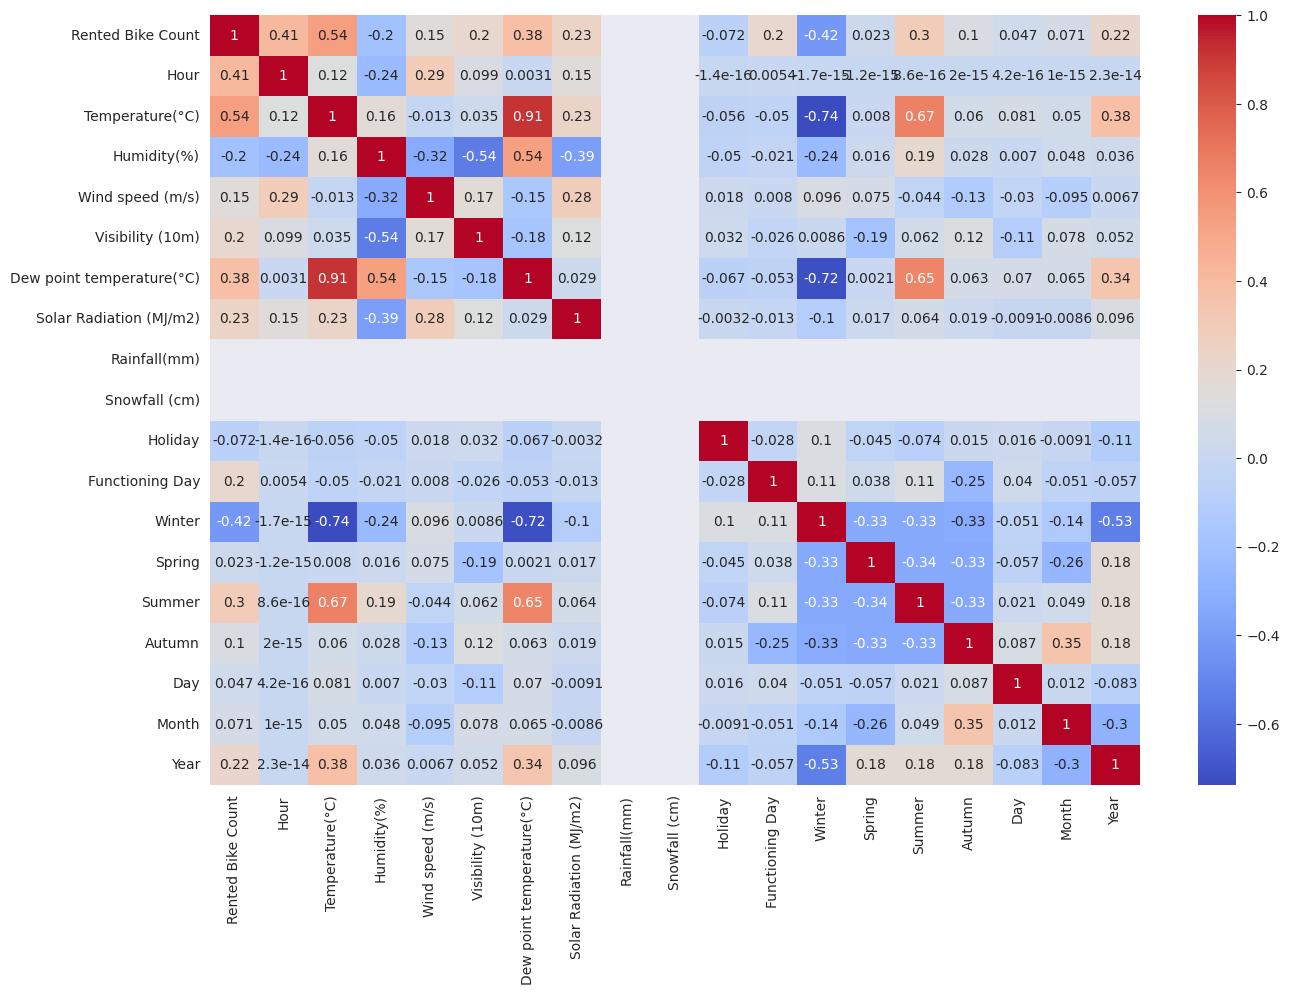

In [66]:
# Select your features wisely to avoid overfitting
# separate the independent variabl from DataFrame.
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm')
plt.show()

In [67]:
# separate the independent variabl from DataFrame.
col_name = list(set(df.columns) - {'Rented Bike Count'})


In [68]:
# creating function for calculate VIF
def calculate_vif(x):
  """ This Function calculate the VIF of each variable."""
  vif_df = pd.DataFrame()
  vif_df['Varible'] = x.columns
  vif_df['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
  return vif_df


In [69]:
# passing the column name into the function
calculate_vif(df[col_name])

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,Varible,VIF
0,Hour,1.187380e+00
1,Holiday,1.028312e+00
2,Wind speed (m/s),1.259740e+00
3,Solar Radiation (MJ/m2),1.428848e+00
4,Humidity(%),1.978286e+01
5,Month,1.614077e+00
6,Winter,2.489607e+07
7,Visibility (10m),1.703378e+00
8,Summer,2.546278e+07
9,Year,1.926842e+00


In [70]:
# Droping the column Rainfall and Snowfall.
df.drop(columns=['Rainfall(mm)','Snowfall (cm)'],axis=1, inplace=True)

In [71]:
# Remaining independent columns
col_name = list(set(df.columns) - {"Rented Bike Count"})

In [72]:
#passing the remaining columns name into the function
calculate_vif(df[col_name])

,Varible,VIF
0,Hour,1.187380e+00
1,Holiday,1.028312e+00
2,Wind speed (m/s),1.259740e+00
3,Solar Radiation (MJ/m2),1.428848e+00
4,Humidity(%),1.978286e+01
5,Month,1.614077e+00
6,Winter,2.489607e+07
7,Visibility (10m),1.703378e+00
8,Summer,2.546278e+07
9,Year,1.926842e+00


In [73]:
# Droping the Winter and Dew point temperatre columns
df.drop(columns=['Winter','Dew point temperature(°C)'], axis=1, inplace= True)
# Remaining independent columns
col_name = list(set(df.columns) - {"Rented Bike Count"})

In [74]:
# Calculate VIF
calculate_vif(df[col_name])

,Varible,VIF
0,Hour,4.462245
1,Visibility (10m),11.105451
2,Summer,9.508659
3,Year,94.243662
4,Autumn,4.950243
5,Spring,4.037231
6,Holiday,1.075638
7,Functioning Day,32.220043
8,Wind speed (m/s),5.193171
9,Solar Radiation (MJ/m2),2.026346


In [75]:
# Droping the Year and Functioning Day  columns
df.drop(columns=['Year','Functioning Day'], axis=1, inplace= True)
# Remaining independent columns
col_name = list(set(df.columns) - {"Rented Bike Count"})

In [76]:
# Calculate VIF
calculate_vif(df[col_name])

,Varible,VIF
0,Hour,4.113248
1,Visibility (10m),5.670249
2,Summer,9.473220
3,Autumn,4.887153
4,Spring,3.949554
5,Holiday,1.072456
6,Wind speed (m/s),4.885547
7,Solar Radiation (MJ/m2),1.833569
8,Temperature(°C),9.929382
9,Humidity(%),7.019460


##### What all feature selection methods have you used  and why?



*   I extracted the day, month, and year from the datetime and created three new columns.

*   To evaluate multicollinearity in our dataset, I utilized the VIF method. As per the convention, if the VIF exceeds 10, it indicates significant collinearity. Therefore, I systematically removed columns with VIF greater than 10.



##### Which all features you found important and why?

I have dropped the columns "Rainfall", "snowfall", "winter" , "Dew Point temperature", " Year" and "Function day" due to their higher VIF scores. All other columns have been retained for further analysis.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

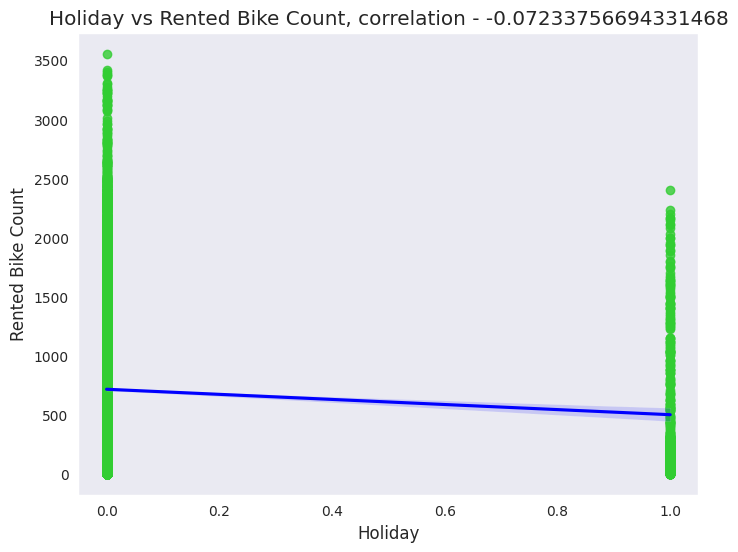

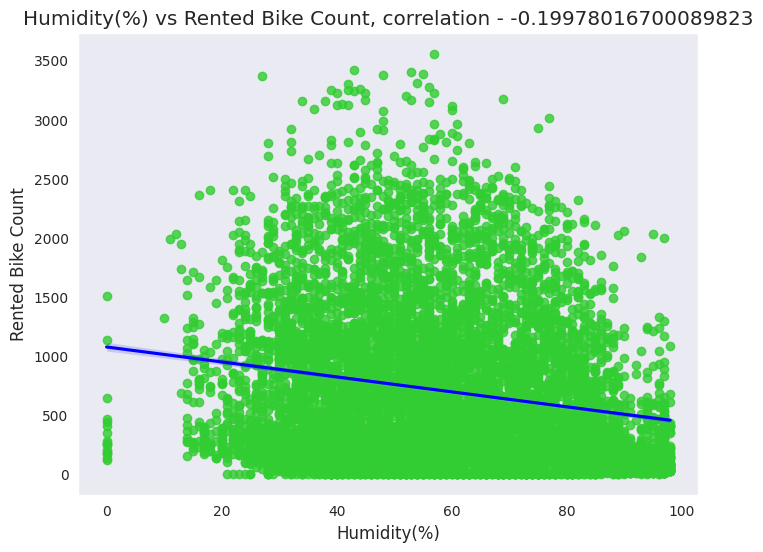

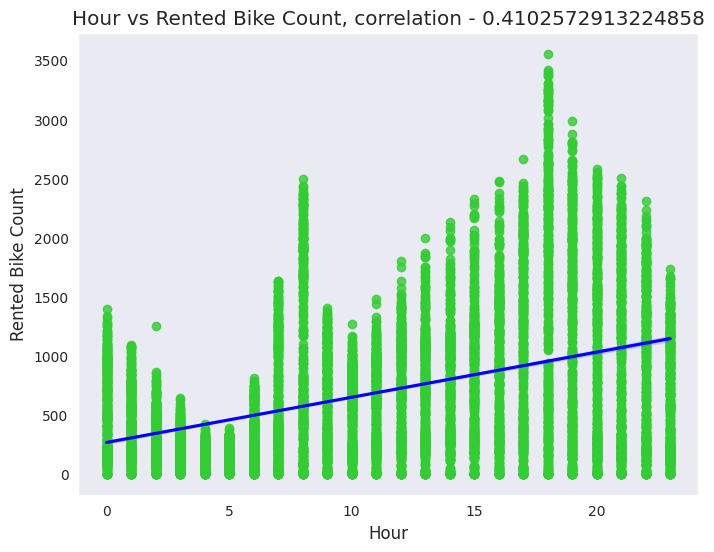

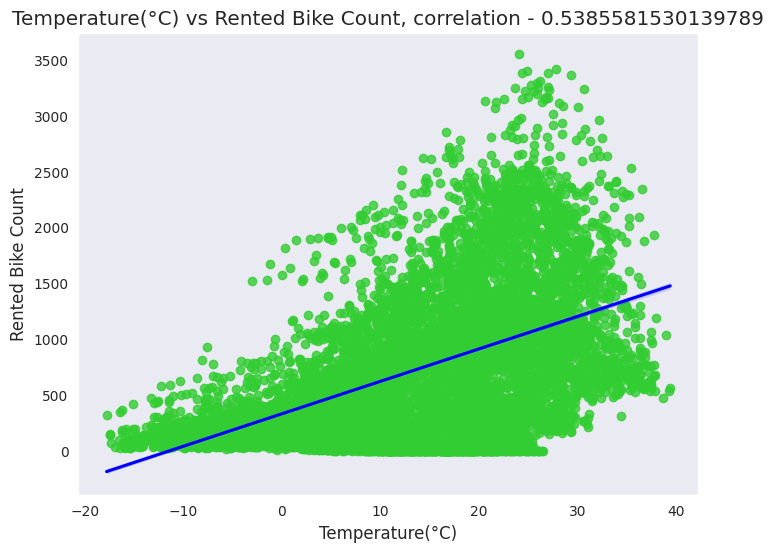

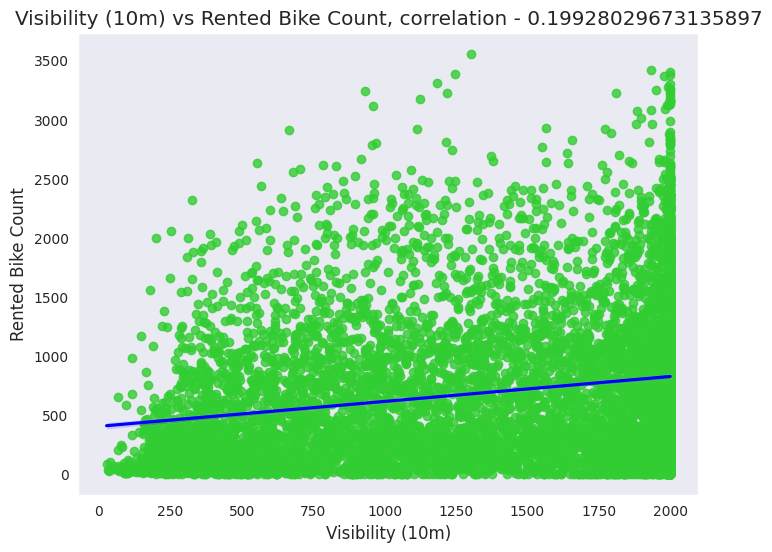

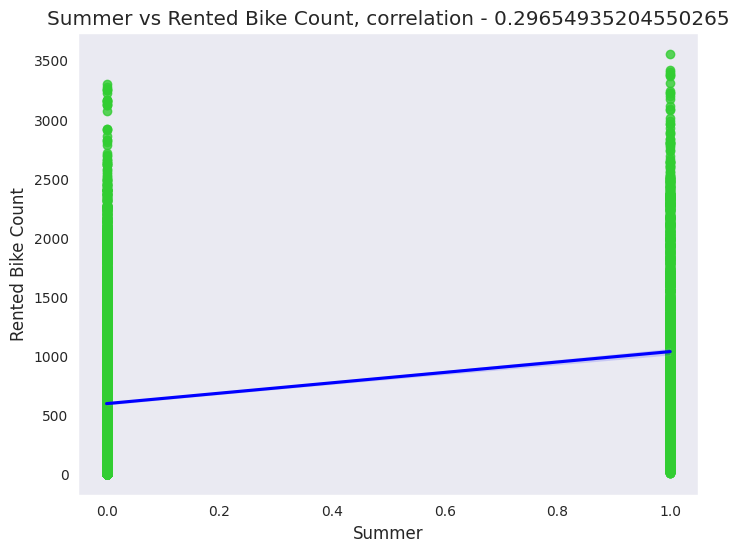

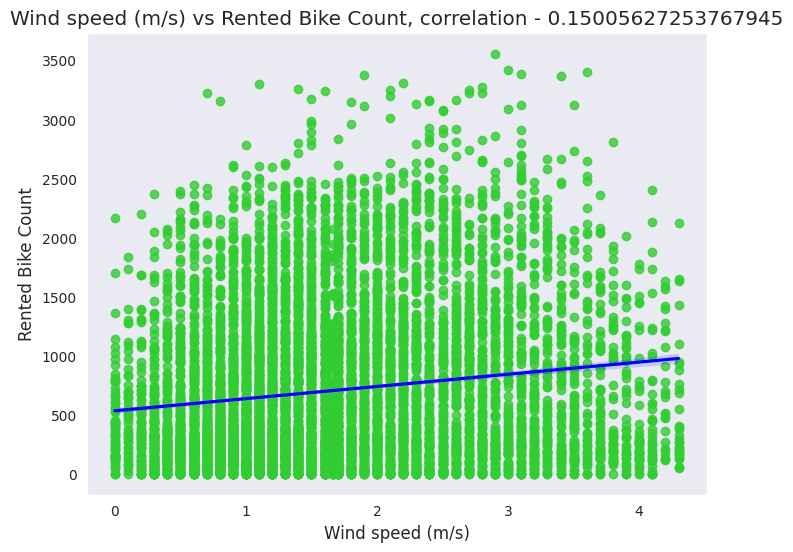

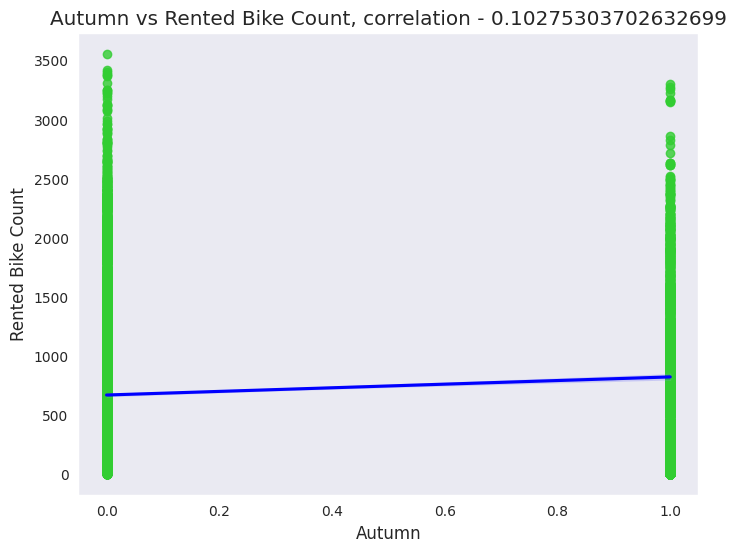

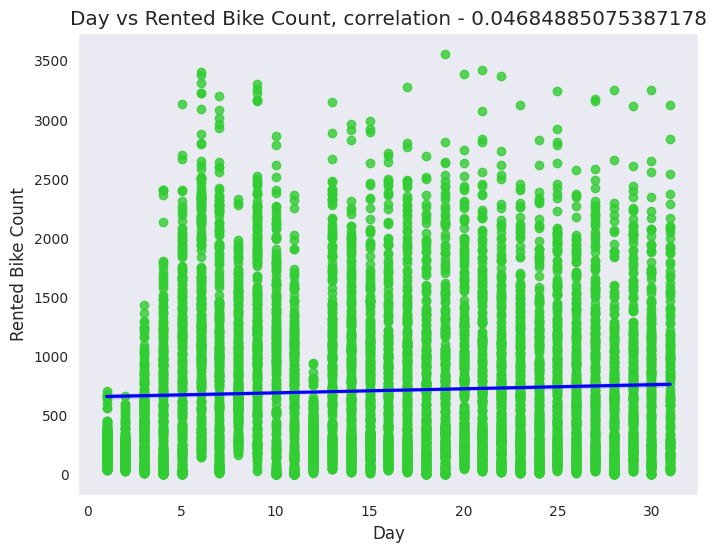

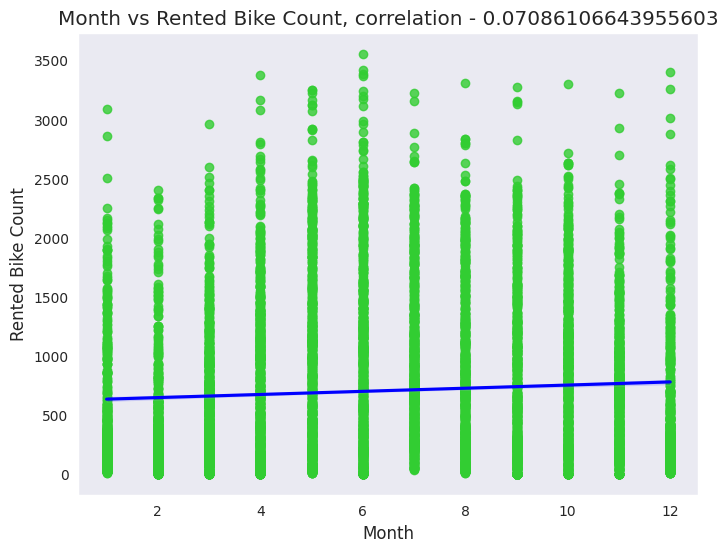

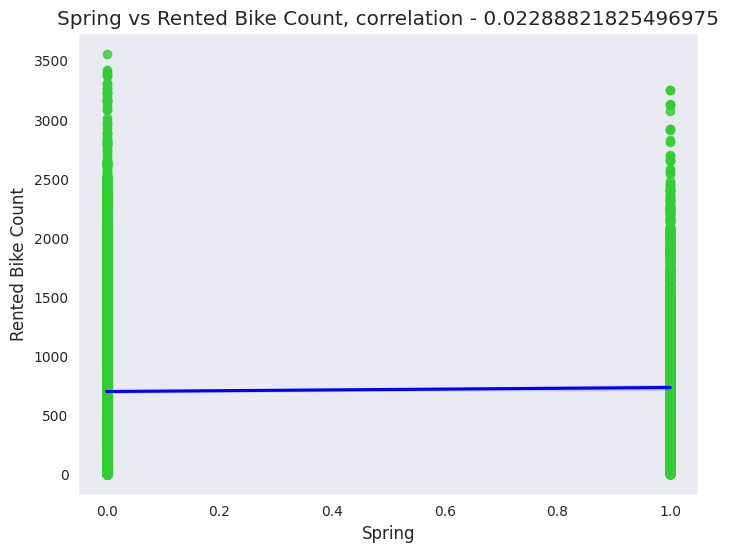

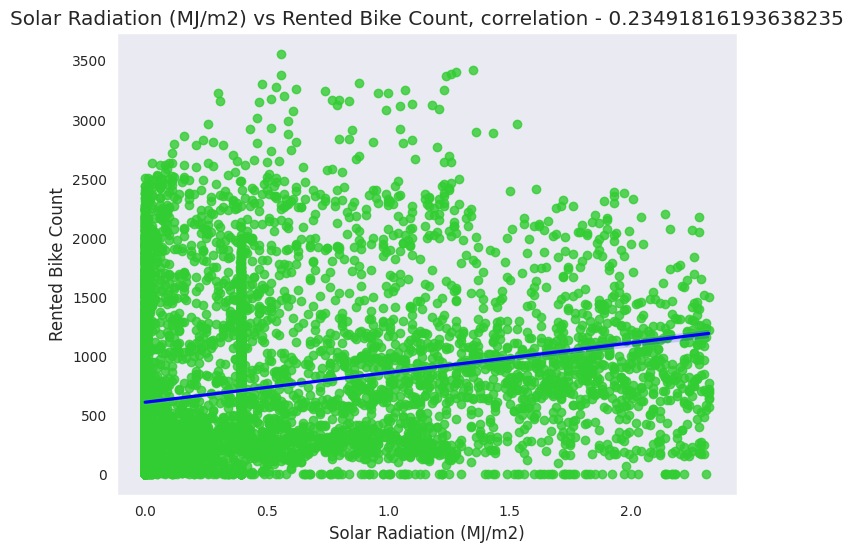

In [ ]:
# Transform Your data
# Checking our independent columns linear connected to our target columns.
for col in col_name:
  fig, ax = plt.subplots(figsize=(8,6))
  sns.regplot( x=df[col], y=df['Rented Bike Count'],scatter_kws={'color':'limegreen'}, line_kws={'color':'blue'})
  corr = df[col].corr(df['Rented Bike Count'])
  ax.set_title(col + ' vs Rented Bike Count, correlation - ' + str(corr))

#### Upon visualization, it is evident that our independent variables exhibit a linear relationship with the target variable.

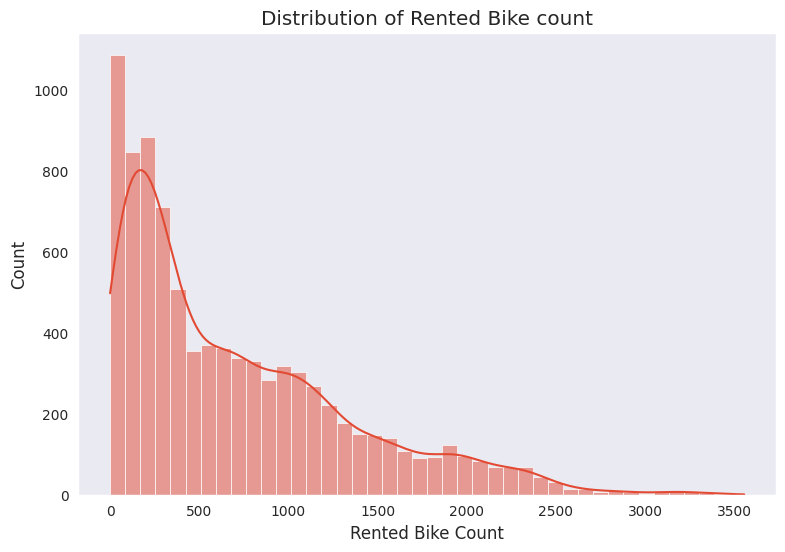

In [77]:
# checking the distribution of target column
plt.figure(figsize=(9,6))
sns.histplot(data = df, x=df['Rented Bike Count'], kde=True)
plt.title("Distribution of Rented Bike count")
plt.show()



The visualization indicates that the target column is right-skewed. Therefore, it is necessary to transform it into a normal distribution.

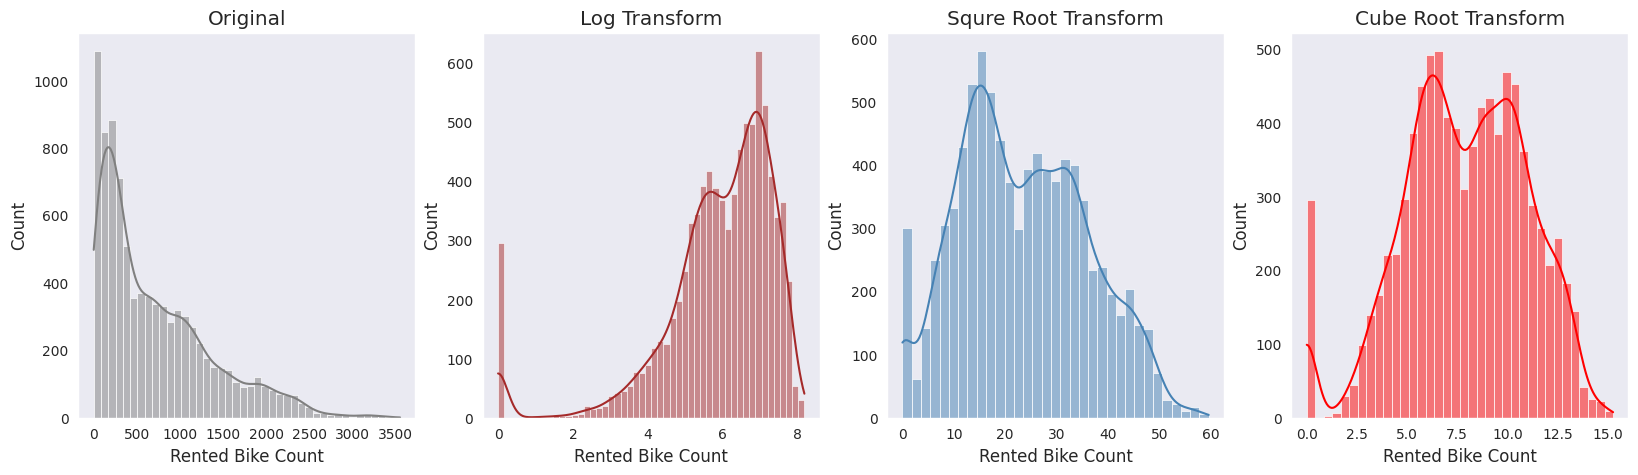

In [78]:
# Applying Log, Squre root and cube root transformation.
fig, axes = plt.subplots(1,4,figsize=(20,5))
sns.histplot(df['Rented Bike Count'], ax = axes[0],color='gray', kde=True)  # Original distribution
axes[0].set_title('Original')

sns.histplot(np.log1p(df['Rented Bike Count']),ax = axes[1],color='brown', kde=True)  # Log Transformation
axes[1].set_title('Log Transform')

sns.histplot(np.sqrt(df['Rented Bike Count']),ax = axes[2],color='steelblue', kde=True)  # Squre Root Transformation
axes[2].set_title('Squre Root Transform')

sns.histplot(np.cbrt(df['Rented Bike Count']), ax= axes[3], color='red', kde=True)   # Cube Root Transformation
axes[3].set_title('Cube Root Transform')
plt.show()


### After applying the log, square root, and cube root transformations, we can conclude that the square root transformation yields a dataset that more closely resembles a normal distribution.

In [79]:
# Squre root Transformation of target column
df['Rented Bike Count'] = np.sqrt(df['Rented Bike Count'])

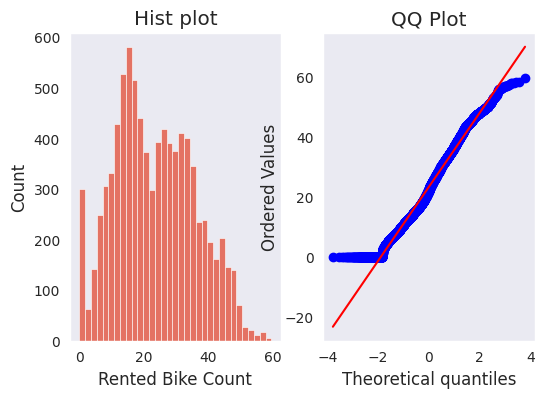

In [80]:
# After applying Square root Tranformation, Drawing QQ plot
plt.figure(figsize=(6,4))
plt.subplot(121)
sns.histplot(df['Rented Bike Count'])  # histogram
plt.title("Hist plot")

plt.subplot(122)
stats.probplot(df['Rented Bike Count'], dist = 'norm',plot=plt)   # QQ plot
plt.title('QQ Plot')

plt.show()

### 6. Data Scaling

In [82]:
# Scaling your data
df_scale = df.copy()   # copy the dataset

# Standard Scaler
std_scaler = StandardScaler()

# Applying Standard Scaler
df_scale[['Hour', 'Temperature(°C)', 'Humidity(%)','Wind speed (m/s)', 'Visibility (10m)',
          'Solar Radiation (MJ/m2)','Holiday', 'Spring', 'Summer', 'Autumn', 'Day', 'Month']] = std_scaler.fit_transform(df_scale[['Hour', 'Temperature(°C)', 'Humidity(%)','Wind speed (m/s)', 'Visibility (10m)',
          'Solar Radiation (MJ/m2)','Holiday', 'Spring', 'Summer', 'Autumn', 'Day', 'Month']])

##### Which method have you used to scale you data and why?

I have used a standard scaler to scale our values since some features were having too much difference between their lowest and highest values.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [83]:
# Split your data to train and test. Choose Splitting ratio wisely.

# Independent varibale
X = df_scale.iloc[:,1:]
# Dependent Variable
Y = df_scale.iloc[:,0]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)


##### What data splitting ratio have you used and why?

No ratio has been used for splitting data.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1 : Linear Regression


In [84]:
# ML Model - 1 Implementation

linear_regressor = LinearRegression()

# Fit the Algorithm

linear_regressor.fit(x_train, y_train)

# Predict on the model

y_train_regressor_pred = linear_regressor.predict(x_train)
y_test_regressor_pred = linear_regressor.predict(x_test)

Checking Coefficient:-

In [85]:
# Coefficient value of the linear Regression model
linear_regressor.coef_

array([ 3.58576992,  4.3870463 , -3.13054828, -0.03164044,  0.28945511,
        0.19199919, -0.7340348 ,  2.400547  ,  3.07675044,  2.4388452 ,
        0.40161318,  0.52918729])

checking Intercept:-

In [86]:
# Intercept
linear_regressor.intercept_

23.405702149013248

Making function to calculate metrics

In [87]:
def regressor_metrics(model_name, y_train, y_test, y_train_pred, y_test_pred):
  """
  This Function calculate the Linear Regression metrics.

  """
  # mean absolute error
  mae_train = mean_absolute_error(y_train,y_train_pred)
  print(f"MAE of Train value: {mae_train}")
  mae_test = mean_absolute_error(y_test, y_test_pred)
  print(f"MAE of Test Value: {mae_test}")

  print("__" * 20)

  # mean squared error
  mse_train = mean_squared_error(y_train, y_train_pred)
  print(f"MSE of Train value: {mse_train}")
  mse_test = mean_squared_error(y_test, y_test_pred)
  print(f"MSE of Test value: {mse_test}")

  print("__" * 20)

  # Root mean squared error
  rmse_train = np.sqrt(mse_train)
  print(f"RMSE of Train value: {rmse_train}")
  rmse_test = np.sqrt(mse_test)
  print(f"RMSE of Test value: {rmse_test}")

  print("__" * 20)

  # R2 score
  r2_score_train = r2_score(y_train, y_train_pred)
  print(f"R2 Score of Train value: {r2_score_train}")
  r2_score_test = r2_score(y_test, y_test_pred)
  print(f"R2 Score of Test value: {r2_score_test}")

  print("__" * 20)

  # returning the metrics as a list
  # global metric_columns
  # metric_columns = ['model_name', 'MAE_train', 'MSE_train', 'RMSE_train', 'R2_train', 'MAE_test', 'MSE_test', 'RMSE_test', 'R2_test']
  # metric_score = [model_name, mae_train, mse_train, rmse_train, r2_score_train, mae_test, mse_test, rmse_test, r2_score_test]
  # final_dict = dict(zip(metric_columns, metric_score))
  # return [final_dict]


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [88]:
# Visualizing evaluation Metric Score chart

lr = regressor_metrics("Linear Regression",y_train, y_test, y_train_regressor_pred, y_test_regressor_pred)
lr

MAE of Train value: 6.608269631964767
MAE of Test Value: 6.629585014166527
________________________________________
MSE of Train value: 81.05255595568424
MSE of Test value: 81.38212829111032
________________________________________
RMSE of Train value: 9.002919301853385
RMSE of Test value: 9.021204370321643
________________________________________
R2 Score of Train value: 0.47803147915859434
R2 Score of Test value: 0.471258244640156
________________________________________


Visualising Residual plot

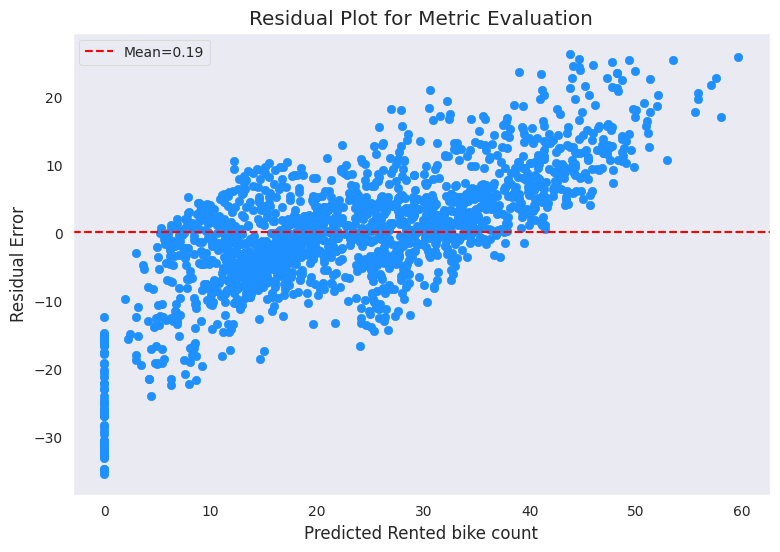

In [89]:
residual = y_test - y_test_regressor_pred
res_mean = np.mean(residual).round(2)
plt.figure(figsize=(9,6))
plt.scatter(y_test, residual, c="dodgerblue")
plt.title("Residual Plot for Metric Evaluation")
plt.xlabel('Predicted Rented bike count')
plt.ylabel('Residual Error')

plt.axhline(y=res_mean, color='red', linestyle='--', label=f"Mean={res_mean}")
plt.legend();

#### 2. Cross- Validation & Hyperparameter Tuning

In [90]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV)
Glinear_regressor = LinearRegression()
parameters = {'fit_intercept':[True,False]}
Grid_regressor = GridSearchCV(Glinear_regressor, parameters, scoring = 'neg_mean_squared_error', cv = 5)

# Fit the Algorithm
Grid_regressor.fit(x_train, y_train)
# Predict on the model
y_train_gridlr_pred = Grid_regressor.predict(x_train)
y_test_gridlr_pred = Grid_regressor.predict(x_test)

In [91]:
print(f"The best parameter: {Grid_regressor.best_params_}")
print(f"The best Score: {Grid_regressor.best_score_}")

The best parameter: {'fit_intercept': True}
The best Score: -81.31670777446476


In [92]:
#coefficients after hyperparamenter and crossvalidation
Grid_regressor.best_estimator_.coef_

array([ 3.58576992,  4.3870463 , -3.13054828, -0.03164044,  0.28945511,
        0.19199919, -0.7340348 ,  2.400547  ,  3.07675044,  2.4388452 ,
        0.40161318,  0.52918729])

In [93]:
# Intercept after hyperparamenter and crossvalidation
Grid_regressor.best_estimator_.intercept_

23.405702149013248

In [94]:
# Printing the performance metrics for the model
glr = regressor_metrics("Linear Regression",y_train, y_test, y_train_gridlr_pred, y_test_gridlr_pred)
glr

MAE of Train value: 6.608269631964767
MAE of Test Value: 6.629585014166527
________________________________________
MSE of Train value: 81.05255595568424
MSE of Test value: 81.38212829111032
________________________________________
RMSE of Train value: 9.002919301853385
RMSE of Test value: 9.021204370321643
________________________________________
R2 Score of Train value: 0.47803147915859434
R2 Score of Test value: 0.471258244640156
________________________________________


##### Which hyperparameter optimization technique have you used and why?

Only hyperparameter used was fit intercept. Linear Regression presents itself with very little option for hyperparameter optimization since it is the simplest model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No improvement in metrics after Gridsearchcv.

Training with Cross Validation will not help in improving the best fit line

### ML Model - 2: Ridge Regression


Ridge regression is a regularization technique that adds a penalty term to the ordinary least squares (OLS) method to prevent overfitting and improve the stability of the model. Ridge regression helps in mitigating the multicollinearity by shrinking the coefficients towards zero and it also helps in finding a balance between bias and variance.

In [95]:
# ML Model - 2 Implementation
ridge = Ridge()

# parameters for hypertuning
ridge_param = {'alpha':[1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}

# instantiating gridsearchcv
ridege_model = GridSearchCV(ridge, ridge_param, scoring = 'neg_mean_squared_error', cv = 5)
# Fit the Algorithm
ridege_model.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 1, 5, 10, 20, 30, 35, 40, 45,
                                   50, 55, 100]},
             scoring='neg_mean_squared_error')

In [96]:
# Predict on the model
y_train_ridge_pred = ridege_model.predict(x_train)
y_test_ridge_pred = ridege_model.predict(x_test)

print("The best alpha value found: ", ridege_model.best_params_)
print("The best score value found: ",ridege_model.best_score_)

The best alpha value found:  {'alpha': 10}
The best score value found:  -81.3161557435463


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [97]:
ridge_metrics = regressor_metrics("Linear Regression",y_train, y_test, y_train_ridge_pred, y_test_ridge_pred)
ridge_metrics

MAE of Train value: 6.608356062394582
MAE of Test Value: 6.629443594036669
________________________________________
MSE of Train value: 81.052840609995
MSE of Test value: 81.38665878219717
________________________________________
RMSE of Train value: 9.002935110839964
RMSE of Test value: 9.021455469168885
________________________________________
R2 Score of Train value: 0.4780296460197404
R2 Score of Test value: 0.4712288099244486
________________________________________


Visualising Residual plot

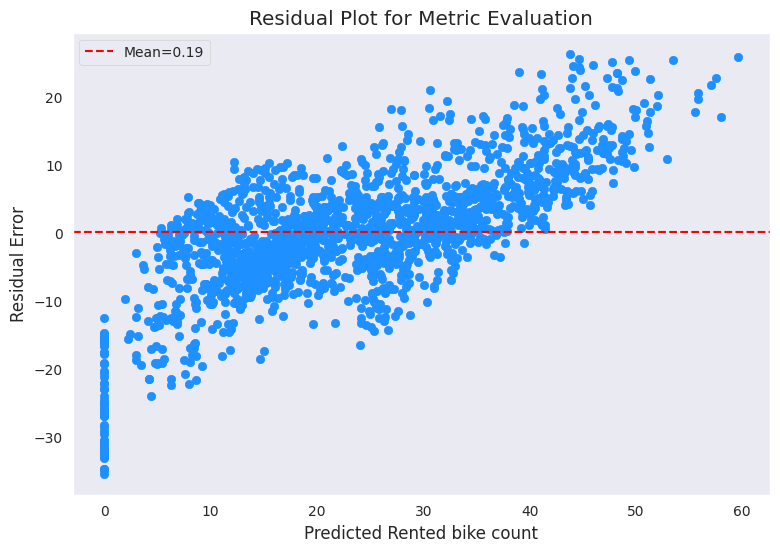

In [98]:
residual = y_test - y_test_ridge_pred
res_mean = np.mean(residual).round(2)
plt.figure(figsize=(9,6))
plt.scatter(y_test, residual, c="dodgerblue")
plt.title("Residual Plot for Metric Evaluation")
plt.xlabel('Predicted Rented bike count')
plt.ylabel('Residual Error')

plt.axhline(y=res_mean, color='red', linestyle='--', label=f"Mean={res_mean}")
plt.legend();

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3: Lasso Regression

In [99]:
# ML Model - 3 Implementation
lasso = Lasso()

# parameters for hypertuning
lasso_param = {'alpha':[1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}

# instantiating gridsearchcv
lasso_model = GridSearchCV(lasso, lasso_param, scoring = 'neg_mean_squared_error', cv = 5)

# Fit the Algorithm
lasso_model.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 1, 5, 10, 20, 30, 35, 40, 45,
                                   50, 55, 100]},
             scoring='neg_mean_squared_error')

In [100]:
# Predict on the model
y_train_lasso_pred = lasso_model.predict(x_train)
y_test_lasso_pred = lasso_model.predict(x_test)

print("The best alpha value found: ", lasso_model.best_params_)
print("The best score value found: ",lasso_model.best_score_)

The best alpha value found:  {'alpha': 0.001}
The best score value found:  -81.31652225724423


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [101]:
# Visualizing evaluation Metric Score chart
lasso_metrics = regressor_metrics("Linear Regression",y_train, y_test, y_train_lasso_pred, y_test_lasso_pred)
lasso_metrics

MAE of Train value: 6.608185097337863
MAE of Test Value: 6.629300149477858
________________________________________
MSE of Train value: 81.05258180709701
MSE of Test value: 81.38021878584433
________________________________________
RMSE of Train value: 9.002920737577167
RMSE of Test value: 9.021098535424848
________________________________________
R2 Score of Train value: 0.4780313126786664
R2 Score of Test value: 0.471270650744388
________________________________________


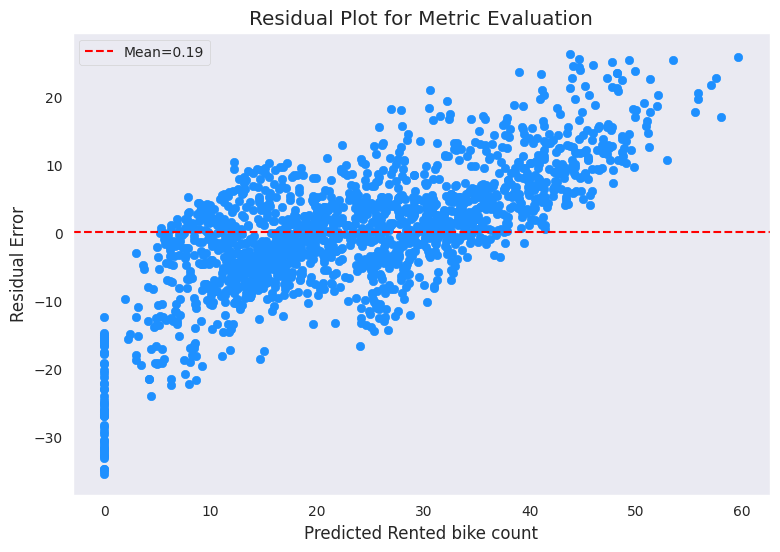

In [177]:
residual = y_test - y_test_lasso_pred
res_mean = np.mean(residual).round(2)
plt.figure(figsize=(9,6))
plt.scatter(y_test, residual, c="dodgerblue")
plt.title("Residual Plot for Metric Evaluation")
plt.xlabel('Predicted Rented bike count')
plt.ylabel('Residual Error')

plt.axhline(y=res_mean, color='red', linestyle='--', label=f"Mean={res_mean}")
plt.legend();

### ML Model - 4: Random Forest

In [173]:
# ML Model - 4 Implementation
rf_regressor = RandomForestRegressor()

# parameters for hypertuning
rf_parameter = {'n_estimators': [100],'max_depth':[12,17,25],'min_samples_leaf':[1,2]}

# instantiating gridsearchcv
rf_model_grid = GridSearchCV(rf_regressor, rf_parameter, scoring = 'r2', cv=5)

# Fit the Algorithm
rf_model_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [12, 17, 25], 'min_samples_leaf': [1, 2],
                         'n_estimators': [100]},
             scoring='r2')

In [174]:
# Predict on the model
y_train_rf_pred = rf_model_grid.predict(x_train)
y_test_rf_pred = rf_model_grid.predict(x_test)

print("The best alpha value found: ", rf_model_grid.best_params_)
print("The best score value found: ",rf_model_grid.best_score_)

The best alpha value found:  {'max_depth': 17, 'min_samples_leaf': 1, 'n_estimators': 100}
The best score value found:  0.7733679995736011


In [175]:
# Visualizing evaluation Metric Score chart
rf_metrics = regressor_metrics("Random Forest",y_train, y_test, y_train_rf_pred, y_test_rf_pred)
rf_metrics

MAE of Train value: 1.3907085629443188
MAE of Test Value: 3.46860955282257
________________________________________
MSE of Train value: 4.987568617471246
MSE of Test value: 30.534760015879524
________________________________________
RMSE of Train value: 2.233286505908108
RMSE of Test value: 5.525826636430021
________________________________________
R2 Score of Train value: 0.9678806697313793
R2 Score of Test value: 0.8016148883138597
________________________________________


In [183]:
rf_best = rf_model_grid.best_estimator_
rf_best

RandomForestRegressor(max_depth=17)

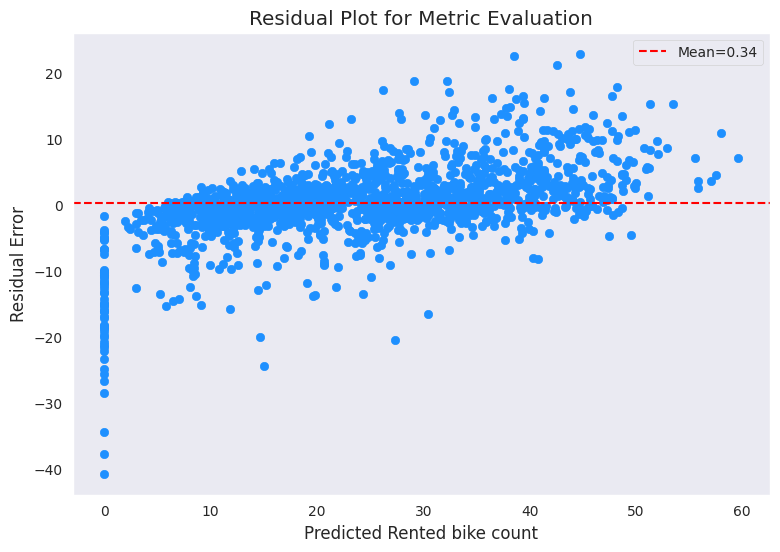

In [176]:
residual = y_test - y_test_rf_pred
res_mean = np.mean(residual).round(2)
plt.figure(figsize=(9,6))
plt.scatter(y_test, residual, c="dodgerblue")
plt.title("Residual Plot for Metric Evaluation")
plt.xlabel('Predicted Rented bike count')
plt.ylabel('Residual Error')

plt.axhline(y=res_mean, color='red', linestyle='--', label=f"Mean={res_mean}")
plt.legend();

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

In [178]:
# installing the shape library
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 3.7 MB/s eta 0:00:00


In [179]:
#Initialising javascript for visualisation of SHAP
import shap

100%|===================| 7007/7008 [07:25<00:00]       

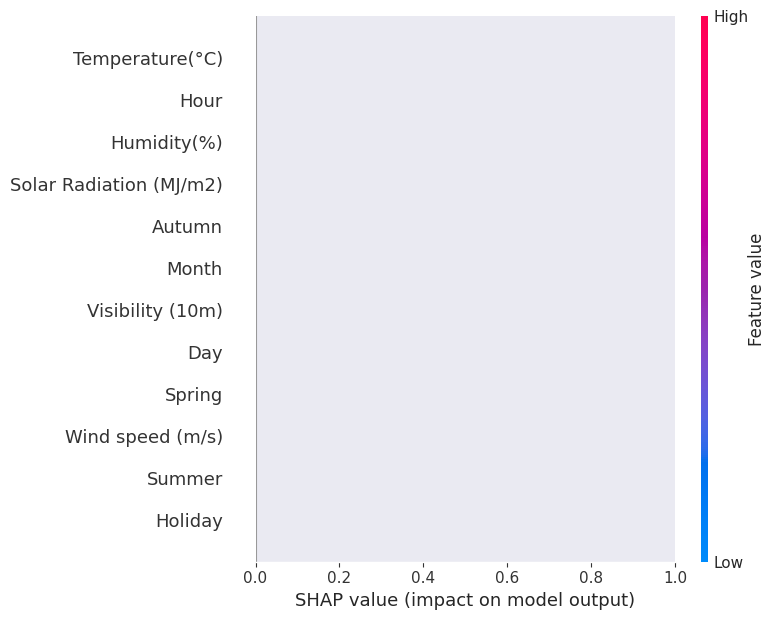

In [185]:
#Plotting shap summary plot for Random forest regression model
explainer = shap.Explainer(rf_best, x_train)
shap_values = explainer.shap_values(x_train, check_additivity=False)
shap.summary_plot(shap_values, x_train, plot_type="beeswarm", feature_names=X.columns)

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***